# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment
in this project, well aim to find a clear pattern between the Traffic accedetns and the accedent's Regions in Saudi Arabia. Here also, well determine any other factors that could affect the accedents percentage and the type of casulties (Death/Insured).

By looking at the number of traffic accidents and driving licenses issued in Saudi Arabia, analysing the data and defining clear patterns between them, we must come out with clear findings that can reduce the number of accedents and casulties.

## Executive Summary
From this data set, we need to find the relations and patterns between the data, to come up with usefall findings, that might reduce the number of Accedents, Injaries and Deaths from Car accedents. 
The project started by observing the two given data sets, cleaning them rearanging and grouping them, then merging them together. After the merge we started to conduct some statistical findings to retrive some usefall findings. Finally some plottings and visualilzation (heatmap, bar charts, histograms and scatters) was conducted to view the max min, mean, average values among all the given features.
we found that the maximum number of Driving licenses issued in Riyah, which hit a high oulier number. Evan that Hail region was also above the average; it wasnt icluded in the highes average range of accedetns in 2017. On the other hand, Tabouk region was ander the average regions issueing driving licences, but thier number of accedents was above the averange range.

The highest percentage of Accedents, Injaries, and Deaths appears to be in Makkah Region 2017, even though it was second after Riyadh region in number of Licences issued.
Najran region had the lowest licences issued and the lowest Accedents as well.
Finally, the most impact between data is the Number of Driving licences issued, it positively affects on :
    - Number of accedents by 71%.
    - Number of Deaths by 60%
    - Number of Injaries by 45%.

### Contents:
- Datasets-Description
- Data Import & Cleaning
- Exploratory Data Analysis
- Data Visualization
- Descriptive and Inferential Statistics
- Conclusions and Recommendations

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

*All libraries used should be added here, including any Jupyter magic commands*

In [294]:
#Importing required libraries
import numpy as np
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

#### 1. Read In Driving Licenses & Traffic Accidents Data
Here i will read saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately traffic_accedents, and drivint_licence dataframes.

In [295]:
#reading the data files and assigning them to two different variables:
traffic_accedents = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', sep=';')
drivint_licenses= pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [296]:
traffic_accedents.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"


In [297]:
traffic_accedents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


In [299]:
# i must check types again after cleaning
traffic_accedents.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [301]:
#checking the number of rows and columns in traffic_accedents dataframe
traffic_accedents.shape

(84, 7)

In [303]:
#veiwing the sencond dataframe
drivint_licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [304]:
#checking the types of columns in the second dataframe:
drivint_licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


#### 3. Describing the data
#first data frame : traffic_accedents include 7 columns and 87 rows:
- Unnaed 0, and Unnamed 1 : are two redundent columns from the index coulumne and have no meanings
- Year : represents the year of which the traffic accedents occured
- Region: represents all reagons in Sadui Arabia
- Indicator: represents the type of accedent casulties: number of accedents, number of insured and dead
- 2dgeo_location: represents the x, y axis on map for the location where, the accedents occure.

#The second data frame: drivint_licenses: include 5 columns and 350 rows.
- Unnamed:0 : represent a redundent column of the index.
- Year: represents the year of issuing the driving licences
- Admenistrative area: represents the region where the licence where issued.
- Driving Licence : represents the number of licence issued
- geo point_2d: represents the x,y location on map where licence whre issued

moreover, as seed in by the .info(): most columns are non-numeric form; thus we will need to change its types into numerics.

#### 4a. How complete is the data?

To invistegate the missing values: here i will search for zeroes or NaN values to indicate the missing values:
and clearly we have no zero's insted they have undesired characters such as paranthesis (year), and n in Drivint Licence.

In [309]:
drivint_licenses.loc[:,drivint_licenses.all()]

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [310]:
# to indicate coluns with Nan: this mean's the column geo_point_2d has null values
drivint_licenses.loc[:,drivint_licenses.isnull().any()]

,geo_point_2d
0,"21.628962766, 41.2636898334"
1,"21.628962766, 41.2636898334"
2,"21.628962766, 41.2636898334"
3,"21.628962766, 41.2636898334"
4,"21.628962766, 41.2636898334"
5,"21.628962766, 41.2636898334"
6,"24.927534539, 39.4918237173"
7,"24.927534539, 39.4918237173"
8,"24.927534539, 39.4918237173"
9,"24.927534539, 39.4918237173"


In [311]:
drivint_licenses.isnull().sum() # so now we know that geo_point_2d has 25 null values

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

In [312]:
# to view the null rows:
print(drivint_licenses[drivint_licenses["geo_point_2d"].isnull()])

     Unnamed: 0    Year Administritive Area Driving Liceses geo_point_2d
58           58  (2015)               Total         435439n          NaN
59           59  (2017)               Total         928165n          NaN
60           60  (1993)               Total         294893n          NaN
61           61  (1994)               Total         303520n          NaN
62           62  (2003)               Total         254858n          NaN
63           63  (2006)               Total         267508n          NaN
142         142  (2014)               Total         625414n          NaN
143         143  (2010)               Total         386510n          NaN
144         144  (2012)               Total         411204n          NaN
145         145  (1999)               Total         332210n          NaN
146         146  (2002)               Total         282038n          NaN
147         147  (2001)               Total         264725n          NaN
148         148  (2004)               Total        

### HERE data cleanins starts:

In [313]:
#dropping the null coulumn:
drivint_licenses.dropna(how='any', inplace=True)

In [314]:
# now to check if ther are still any null values in the rows:
drivint_licenses.isnull().sum()

Unnamed: 0             0
Year                   0
Administritive Area    0
Driving Liceses        0
geo_point_2d           0
dtype: int64

In [315]:
traffic_accedents.isnull().sum() # so this dataframe includes 6 rows with null values in the geo_point_2d column

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [420]:
#dropping all rows with Nan values from the dataframe by: :
traffic_accedents.dropna(how='any', inplace=True)

In [421]:
# to view the null rows:(it appears that we had 6 null rows, but now there isnt any becuse we droped them in the previous command)
print(traffic_accedents[traffic_accedents["geo_point_2d"].isnull()])

KeyError: 'geo_point_2d'

In [318]:
traffic_accedents.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    0
dtype: int64

In [319]:
#Code : i can drop unusefull columns by: drivint_licenses.drop('col name', axis='columns' , inplace=True)
#i can drop all rows with Nan values from the dataframe by: drivint_licenses.dropna(how='any')

In [422]:
#drop the coluns that include nan values,
drivint_licenses.drop(['Unnamed: 0'], axis='columns', inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [423]:
drivint_licenses.head(8)

,Year,Region,Driving_Licence,x_geo_point,y_geo_point
0,2012,Makkah,143954,21.628963,41.263690
1,1994,Makkah,75349,21.628963,41.263690
2,1998,Makkah,86082,21.628963,41.263690
3,2004,Makkah,86636,21.628963,41.263690
4,2005,Makkah,65099,21.628963,41.263690
5,2008,Makkah,77013,21.628963,41.263690
6,2014,Madinah,31447,24.927535,39.491824
7,2013,Madinah,28513,24.927535,39.491824


In [424]:
traffic_accedents.head()

,Year,Region,Indicator,Value,x_geo_point,y_geo_point
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [323]:
# Unnamed 0. is dropped
traffic_accedents.drop(['Unnamed: 0.1'], axis='columns', inplace=True)

In [425]:
traffic_accedents.head()

,Year,Region,Indicator,Value,x_geo_point,y_geo_point
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


## Still cleaning!
- remove the semi colon from geo_point_2d
- remove parantheses from year columns
- remove n cahracter from the values columns
- change the object values to integers

In [426]:
#removing the n, ), and ,, how to retain the changes
traffic_accedents['Year']=traffic_accedents.Year.map(lambda x: x.replace(')',''))
traffic_accedents['Year']=traffic_accedents.Year.map(lambda x: x.replace('(',''))
traffic_accedents['Value']=traffic_accedents.Value.map(lambda x: x.replace('n',''))


AttributeError: 'int' object has no attribute 'replace'

In [429]:
traffic_accedents.head()

,Year,Region,Indicator,Value,x_geo_point,y_geo_point
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [427]:
drivint_licenses['Year']=drivint_licenses.Year.map(lambda x: x.replace(')',''))
drivint_licenses['Year']=drivint_licenses.Year.map(lambda x: x.replace('(',''))
#drivint_licenses['Driving Liceses']=drivint_licenses.Driving Liceses.map(lambda x: x.replace('n',''))


AttributeError: 'int' object has no attribute 'replace'

####  6 Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. 
**traffic_accedents**
- change Year --> year
- change Region --> region
**drivint_licence**
- change Year --> year
- change Admenistrative area --> region
- change Driving Licenses --> Driving_Licence
- separate the geo_point_2d into two colums and rename them x y


In [329]:

#we need to rename the Driving licence name because of the mistke and space and we want to unite it with the traffic_accedent df
#also rename the administrative area to region
drivint_licenses.rename(columns={'Driving Liceses': 'Driving_Licence'}, inplace=True)
drivint_licenses.head()

,Year,Administritive Area,Driving_Licence,geo_point_2d
0,2012,Makkah,143954n,"21.628962766, 41.2636898334"
1,1994,Makkah,75349n,"21.628962766, 41.2636898334"
2,1998,Makkah,86082n,"21.628962766, 41.2636898334"
3,2004,Makkah,86636n,"21.628962766, 41.2636898334"
4,2005,Makkah,65099n,"21.628962766, 41.2636898334"


In [330]:
drivint_licenses.rename(columns={'Administritive Area': 'Region'}, inplace=True)

In [331]:
drivint_licenses.head()

,Year,Region,Driving_Licence,geo_point_2d
0,2012,Makkah,143954n,"21.628962766, 41.2636898334"
1,1994,Makkah,75349n,"21.628962766, 41.2636898334"
2,1998,Makkah,86082n,"21.628962766, 41.2636898334"
3,2004,Makkah,86636n,"21.628962766, 41.2636898334"
4,2005,Makkah,65099n,"21.628962766, 41.2636898334"


In [431]:
#here i removed the 'n'
drivint_licenses['Driving_Licence']=drivint_licenses.Driving_Licence.map(lambda x: x.replace('n',''))
drivint_licenses.head()

AttributeError: 'int' object has no attribute 'replace'

In [333]:
# must separate the geo_point_2d into two colums and rename them x y in Driving licence df

drivint_licenses['x_geo_point'], drivint_licenses['y_geo_point'] = drivint_licenses['geo_point_2d'].str.split(',', 1).str
#now i need to drop the old geo_point_2d column
drivint_licenses.drop(['geo_point_2d'], axis='columns', inplace=True)
drivint_licenses.head()

,Year,Region,Driving_Licence,x_geo_point,y_geo_point
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


In [334]:
# must separate the geo_point_2d into two colums and rename them x y in Traffic accedent df:
traffic_accedents['x_geo_point'], traffic_accedents['y_geo_point'] = traffic_accedents['geo_point_2d'].str.split(',', 1).str
#now i need to drop the old geo_point_2d colum
traffic_accedents.drop(['geo_point_2d'], axis='columns', inplace=True)

In [335]:
traffic_accedents.drop(['Unnamed: 0.1'], axis='columns', inplace=True)

KeyError: "['Unnamed: 0.1'] not found in axis"

In [336]:
traffic_accedents.drop(['Unnamed: 0'], axis='columns', inplace=True)
traffic_accedents.head()

,Year,Region,Indicator,Value,x_geo_point,y_geo_point
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [430]:
drivint_licenses.describe()

,Year,Driving_Licence,x_geo_point,y_geo_point
count,325.000000,325.000000,325.000000,325.000000
mean,2005.000000,28915.347692,23.810447,42.602789
std,7.222222,47419.058819,4.197987,3.254196
min,1993.000000,915.000000,17.207231,37.259858
25%,1999.000000,4846.000000,20.148406,41.263690
50%,2005.000000,10267.000000,23.288331,41.817119
75%,2011.000000,25423.000000,27.400846,43.343000
max,2017.000000,495307.000000,30.197075,50.147830


In [338]:
#Code 
drivint_licenses.max()

Year                         2017
Region                     Tabouk
Driving_Licence              9983
x_geo_point          30.197074783
y_geo_point         50.1478302439
dtype: object

In [339]:
drivint_licenses.min()

Year                         1993
Region                    Al-Baha
Driving_Licence            100291
x_geo_point         17.2072313962
y_geo_point         37.2598581394
dtype: object

#### 5. Determine the data types:
Display the data types of each feature. 

In [340]:
#code .....type()
drivint_licenses.dtypes

Year               object
Region             object
Driving_Licence    object
x_geo_point        object
y_geo_point        object
dtype: object

#### 6. Fix incorrect data types


In [341]:
drivint_licenses["Year"] = pd.to_numeric(drivint_licenses["Year"])


In [342]:

drivint_licenses["Driving_Licence"] = pd.to_numeric(drivint_licenses["Driving_Licence"])
drivint_licenses["x_geo_point"] = pd.to_numeric(drivint_licenses["x_geo_point"])
drivint_licenses["y_geo_point"] = pd.to_numeric(drivint_licenses["y_geo_point"])


In [343]:
drivint_licenses.dtypes

Year                 int64
Region              object
Driving_Licence      int64
x_geo_point        float64
y_geo_point        float64
dtype: object

In [344]:
traffic_accedents['Year']=pd.to_numeric(traffic_accedents["Year"])
traffic_accedents['Value']=pd.to_numeric(traffic_accedents["Value"])
traffic_accedents['x_geo_point']=pd.to_numeric(traffic_accedents["x_geo_point"])
traffic_accedents['y_geo_point']=pd.to_numeric(traffic_accedents["y_geo_point"])

In [345]:
traffic_accedents.dtypes

Year             int64
Region          object
Indicator       object
Value            int64
x_geo_point    float64
y_geo_point    float64
dtype: object


# datatypes has been changed from object's into numeric , to manipulate operations on them. 


In [346]:
drivint_licenses.head(30)

,Year,Region,Driving_Licence,x_geo_point,y_geo_point
0,2012,Makkah,143954,21.628963,41.263690
1,1994,Makkah,75349,21.628963,41.263690
2,1998,Makkah,86082,21.628963,41.263690
3,2004,Makkah,86636,21.628963,41.263690
4,2005,Makkah,65099,21.628963,41.263690
5,2008,Makkah,77013,21.628963,41.263690
6,2014,Madinah,31447,24.927535,39.491824
7,2013,Madinah,28513,24.927535,39.491824
8,2012,Madinah,14459,24.927535,39.491824
9,1994,Madinah,3767,24.927535,39.491824


In [347]:
traffic_accedents.head(30)

,Year,Region,Indicator,Value,x_geo_point,y_geo_point
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696
5,2016,Northern Boarder,No. of Casualties - Dead,193,30.197075,41.817119
6,2017,Jazan,No. of Accidents,22161,17.207231,42.652581
7,2017,Al-Jouf,No. of Accidents,10469,29.967745,39.557037
9,2016,Northern Boarder,No. of Casualties - Injured,631,30.197075,41.817119
10,2016,Jazan,No. of Casualties - Dead,514,17.207231,42.652581


In [353]:
#code

#### 7. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|Year|int|car_accedent_licence_related|year represting timing of incedents| 
|region|obj|car_accedent_licence_related|Saudi reagions|
|no_of_Accedents|int|car_accedent_licence_related|Number car_accedent_licence_relatedof car Accedents|
|Driving_Licence|int|car_accedent_licence_related|Number of Driving Licences issued|
|no_of_Insured_casult|int|car_accedent_licence_related|Number of Injared casulties|
|no_of_Dead_casult|int|car_accedent_licence_related|Number of Dead casulties|
|x_geo_loc|float|car_accedent_licence_related| x axes of geolocation of the insedent|
|y_geo_loc|float|car_accedent_licence_related| y axes of geolocation of the insedent|



In [354]:
# Done
#Code i can drop all rows with Nan values from the dataframe by: drivint_licenses.dropna(how='any')

#### 8. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [355]:
# Driving _licences is a wide dataframe; because the columns are better to be ungrouped
drivint_licenses.columns


Index(['Year', 'Region', 'Driving_Licence', 'x_geo_point', 'y_geo_point'], dtype='object')

In [356]:
drivint_licenses.Driving_Licence.unique().sum()


9397488

In [357]:
drivint_licenses.Year.unique()

array([2012, 1994, 1998, 2004, 2005, 2008, 2014, 2013, 2000, 2007, 1995,
       1996, 2015, 2010, 2001, 2017, 2009, 1993, 1997, 1999, 2003, 2016,
       2011, 2006, 2002], dtype=int64)

In [358]:
drivint_licenses.Region.unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

In [359]:
traffic_accedents.columns # this is a long dataframe because we have 3 indicators related to the values, so we flip them to wide

Index(['Year', 'Region', 'Indicator', 'Value', 'x_geo_point', 'y_geo_point'], dtype='object')

In [360]:
traffic_accedents.Indicator.unique()

array(['No. of Casualties - Injured', 'No. of Casualties - Dead',
       'No. of Accidents'], dtype=object)

#### 9 Changing formats
traffic_accedent is in a long form, but Drivint_licence is in a wide format. here we will Transform the datasets to become bothe in the same format before merging in the next task, which is to wide format.

In [432]:
#code: transforming tratraffic_accedentsc to wide format
wide_traffic_accedents= traffic_accedents.pivot_table(index=['Region','Year'], columns='Indicator', values="Value")
wide_traffic_accedents

Indicator              No. of Accidents  No. of Casualties - Dead  \
Region           Year                                               
Al-Baaha         2016              3618                       185   
                 2017              1414                       134   
Al-Jouf          2016             10212                       245   
                 2017             10469                       240   
Asir             2016             32684                       983   
                 2017             25245                       828   
Eastern Region   2016            101619                      1113   
                 2017             81433                       963   
Hail             2016             10199                       299   
                 2017              9379                       265   
Jazan            2016             25873                       514   
                 2017             22161                       466   
Madinah          2016             14475                       822   
                 2017             16070                       580   
Makkah           2016            134838                      2243   
                 2017            145541                      1641   
Najran           2016              3235                       173   
                 2017              3193                       194   
Northern Boarder 2016             13196                       193   
                 2017             11540                       112   
Qassim           2016             25664                       397   
                 2017             22405                       319   
Riyadh           2016            141736                      1430   
                 2017             99925                      1399   
Tabouk           2016             16031                       434   
                 2017             11713                       348   

Indicator              No. of Casualties - Injured  
Region           Year                               
Al-Baaha         2016                         1227  
                 2017                         1007  
Al-Jouf          2016                          920  
                 2017                          862  
Asir             2016                         2541  
                 2017                         2368  
Eastern Region   2016                         4893  
                 2017                         4073  
Hail             2016                          932  
                 2017                          773  
Jazan            2016                         2259  
                 2017                         2207  
Madinah          2016                         4184  
                 2017                         2917  
Makkah           2016                        12383  
                 2017                        10623  
Najran           2016                          706  
                 2017                          766  
Northern Boarder 2016                          631  
                 2017                          374  
Qassim           2016                         1513  
                 2017                         1446  
Riyadh           2016                         4207  
                 2017                         4540  
Tabouk           2016                         1724  
                 2017                         1243

# Concatinate the new traffic (wide_traffic_accedents, with with traffic_accedetn dataframe,
# step1: 
- perform Group by to the traffic_accedent . mean() --> grouped_traffic

In [433]:
grouped_traffic=traffic_accedents.groupby(['Region','Year']).mean()
#grouped_traffic=traffic_accedents.groupby('Region')['Value'].mean()
grouped_traffic

Value  x_geo_point  y_geo_point
Region           Year                                        
Al-Baaha         2016   1676.666667    20.148406    41.466548
                 2017    851.666667    20.148406    41.466548
Al-Jouf          2016   3792.333333    29.967745    39.557037
                 2017   3857.000000    29.967745    39.557037
Asir             2016  12069.333333    19.138785    42.941470
                 2017   9480.333333    19.138785    42.941470
Eastern Region   2016  35875.000000    23.288331    50.147830
                 2017  28823.000000    23.288331    50.147830
Hail             2016   3810.000000    27.400846    41.440696
                 2017   3472.333333    27.400846    41.440696
Jazan            2016   9548.666667    17.207231    42.652581
                 2017   8278.000000    17.207231    42.652581
Madinah          2016   6493.666667    24.927535    39.491824
                 2017   6522.333333    24.927535    39.491824
Makkah           2016  49821.333333    21.628963    41.263690
                 2017  52601.666667    21.628963    41.263690
Najran           2016   1371.333333    18.451100    46.868850
                 2017   1384.333333    18.451100    46.868850
Northern Boarder 2016   4673.333333    30.197075    41.817119
                 2017   4008.666667    30.197075    41.817119
Qassim           2016   9191.333333    26.196706    43.343000
                 2017   8056.666667    26.196706    43.343000
Riyadh           2016  49124.333333    23.081434    45.585751
                 2017  35288.000000    23.081434    45.585751
Tabouk           2016   6063.000000    27.901655    37.259858
                 2017   4434.666667    27.901655    37.259858

## step 2: 
- concatinate them

In [434]:

grouped_traffic_accedents= pd.concat([wide_traffic_accedents, grouped_traffic], axis=1)
grouped_traffic_accedents

No. of Accidents  No. of Casualties - Dead  \
Region           Year                                               
Al-Baaha         2016              3618                       185   
                 2017              1414                       134   
Al-Jouf          2016             10212                       245   
                 2017             10469                       240   
Asir             2016             32684                       983   
                 2017             25245                       828   
Eastern Region   2016            101619                      1113   
                 2017             81433                       963   
Hail             2016             10199                       299   
                 2017              9379                       265   
Jazan            2016             25873                       514   
                 2017             22161                       466   
Madinah          2016             14475                       822   
                 2017             16070                       580   
Makkah           2016            134838                      2243   
                 2017            145541                      1641   
Najran           2016              3235                       173   
                 2017              3193                       194   
Northern Boarder 2016             13196                       193   
                 2017             11540                       112   
Qassim           2016             25664                       397   
                 2017             22405                       319   
Riyadh           2016            141736                      1430   
                 2017             99925                      1399   
Tabouk           2016             16031                       434   
                 2017             11713                       348   

                       No. of Casualties - Injured         Value  x_geo_point  \
Region           Year                                                           
Al-Baaha         2016                         1227   1676.666667    20.148406   
                 2017                         1007    851.666667    20.148406   
Al-Jouf          2016                          920   3792.333333    29.967745   
                 2017                          862   3857.000000    29.967745   
Asir             2016                         2541  12069.333333    19.138785   
                 2017                         2368   9480.333333    19.138785   
Eastern Region   2016                         4893  35875.000000    23.288331   
                 2017                         4073  28823.000000    23.288331   
Hail             2016                          932   3810.000000    27.400846   
                 2017                          773   3472.333333    27.400846   
Jazan            2016                         2259   9548.666667    17.207231   
                 2017                         2207   8278.000000    17.207231   
Madinah          2016                         4184   6493.666667    24.927535   
                 2017                         2917   6522.333333    24.927535   
Makkah           2016                        12383  49821.333333    21.628963   
                 2017                        10623  52601.666667    21.628963   
Najran           2016                          706   1371.333333    18.451100   
                 2017                          766   1384.333333    18.451100   
Northern Boarder 2016                          631   4673.333333    30.197075   
                 2017                          374   4008.666667    30.197075   
Qassim           2016                         1513   9191.333333    26.196706   
                 2017                         1446   8056.666667    26.196706   
Riyadh           2016                         4207  49124.333333    23.081434   
                 2017                         4540  35288.000000 

#### 10. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. using the inner join should you use to preserve the most real data.
before i can merge the two dataframes i need to change the type of Year in the grouped_traffic_accedents into int:


In [435]:
#no i will merege inner join to both dataframes
car_accedent_licence_related=pd.merge(grouped_traffic_accedents, drivint_licenses, how="inner", on=('Region','Year'))
car_accedent_licence_related


,Region,Year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,Value,x_geo_point_x,y_geo_point_x,Driving_Licence,x_geo_point_y,y_geo_point_y
0,Al-Jouf,2016,10212,245,920,3792.333333,29.967745,39.557037,9371,29.967745,39.557037
1,Al-Jouf,2017,10469,240,862,3857.000000,29.967745,39.557037,8091,29.967745,39.557037
2,Hail,2016,10199,299,932,3810.000000,27.400846,41.440696,54507,27.400846,41.440696
3,Hail,2017,9379,265,773,3472.333333,27.400846,41.440696,22035,27.400846,41.440696
4,Jazan,2016,25873,514,2259,9548.666667,17.207231,42.652581,11504,17.207231,42.652581
5,Jazan,2017,22161,466,2207,8278.000000,17.207231,42.652581,18345,17.207231,42.652581
6,Madinah,2016,14475,822,4184,6493.666667,24.927535,39.491824,24540,24.927535,39.491824
7,Madinah,2017,16070,580,2917,6522.333333,24.927535,39.491824,36165,24.927535,39.491824
8,Makkah,2016,134838,2243,12383,49821.333333,21.628963,41.263690,136055,21.628963,41.263690
9,Makkah,2017,145541,1641,10623,52601.666667,21.628963,41.263690,142487,21.628963,41.263690


#### 11. Drop unnecessary rows from the Merged dataframe: car_accedent_licence_related Datafame:

In [437]:
# now i have to remove the redundunt columns x,y geo points :
car_accedent_licence_related.drop(['x_geo_point_x'], axis='columns', inplace=True)
car_accedent_licence_related.drop(['y_geo_point_x'], axis='columns', inplace=True)
#rename the new mereged dataframe column names, and drop the value column, no need its already distributed among the columns
car_accedent_licence_related.drop(['Value'], axis='columns', inplace=True)

In [438]:
car_accedent_licence_related.rename(columns={'Year': 'year', 'Region':'region','x_geo_point_y':'x_geo_point', 'y_geo_point_y':'y_geo_point', 'No. of Accidents':'no_of_Accedents','No. of Casualties - Dead':'no_of_Dead_casult','No. of Casualties - Injured':'no_of_Injured_casult'}, inplace=True)
car_accedent_licence_related.head(15)

,region,year,no_of_Accedents,no_of_Dead_casult,no_of_Injured_casult,Driving_Licence,x_geo_point,y_geo_point
0,Al-Jouf,2016,10212,245,920,9371,29.967745,39.557037
1,Al-Jouf,2017,10469,240,862,8091,29.967745,39.557037
2,Hail,2016,10199,299,932,54507,27.400846,41.440696
3,Hail,2017,9379,265,773,22035,27.400846,41.440696
4,Jazan,2016,25873,514,2259,11504,17.207231,42.652581
5,Jazan,2017,22161,466,2207,18345,17.207231,42.652581
6,Madinah,2016,14475,822,4184,24540,24.927535,39.491824
7,Madinah,2017,16070,580,2917,36165,24.927535,39.491824
8,Makkah,2016,134838,2243,12383,136055,21.628963,41.263690
9,Makkah,2017,145541,1641,10623,142487,21.628963,41.263690


In [439]:
car_accedent_licence_related.describe()

,year,no_of_Accedents,no_of_Dead_casult,no_of_Injured_casult,Driving_Licence,x_geo_point,y_geo_point
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2016.500000,38877.000000,644.333333,2902.833333,69517.555556,24.529287,41.770823
std,0.514496,51442.889217,615.990737,3412.830880,124299.850286,4.634182,2.913111
min,2016.000000,3193.000000,112.000000,374.000000,2153.000000,17.207231,37.259858
25%,2016.000000,10276.250000,241.250000,795.250000,9586.250000,21.628963,39.557037
50%,2016.500000,13835.500000,391.000000,1483.500000,16085.000000,24.927535,41.440696
75%,2017.000000,24945.000000,761.500000,3867.250000,49921.500000,27.901655,42.652581
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,46.868850


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [443]:
#code
car_accedent_licence_related.to_csv('CarAccedents_DrivingLicence', sep='\t', encoding='utf-8')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.
- from the follwing table unsing .describe(): we found that in Saudi Arabia 2016 and 2017, the total max, min, mean is given:
- **The Minimum/ Max number of Accedents** is : 3,193/ 145,541 and the **mean** is : 38,877 Accedents
- **The Minimum/ Max number of Dead casulties** is: 112/2,243 and the **mean** is: 644 Dead
- **The Minimum/ Max number of Insured casulties** is: 374/12,383 and the **mean** is: 2,902 Insured
- **The Minimum/ Max number of Driving Licences issued** is: 2,153/495,307 and the **mean** is: 69,517 Driving licences issued.

In [444]:
#Code: this gives us the values for numerical columns
car_accedent_licence_related.describe()


,year,no_of_Accedents,no_of_Dead_casult,no_of_Injured_casult,Driving_Licence,x_geo_point,y_geo_point
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2016.500000,38877.000000,644.333333,2902.833333,69517.555556,24.529287,41.770823
std,0.514496,51442.889217,615.990737,3412.830880,124299.850286,4.634182,2.913111
min,2016.000000,3193.000000,112.000000,374.000000,2153.000000,17.207231,37.259858
25%,2016.000000,10276.250000,241.250000,795.250000,9586.250000,21.628963,39.557037
50%,2016.500000,13835.500000,391.000000,1483.500000,16085.000000,24.927535,41.440696
75%,2017.000000,24945.000000,761.500000,3867.250000,49921.500000,27.901655,42.652581
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,46.868850


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [445]:
# creaing std function manually:
def manualy_standardDeviation(x) :
    x_std_list =[]
    x_mean = x.mean()
    x_count = len(x)
    for i in x :
        x_std = (i-x_mean)**2
        x_std_list.append(x_std)
    x_std = np.sqrt(sum(x_std_list)/x_count)
    return x_std

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [446]:
#Code:
# creating the values of the dictionary
Year_std= manualy_standardDeviation(car_accedent_licence_related['year'].values)
No_accedents_std= manualy_standardDeviation(car_accedent_licence_related['no_of_Accedents'].values)
Dead_casult_std= manualy_standardDeviation(car_accedent_licence_related['no_of_Dead_casult'].values)
Injured_casult_std=manualy_standardDeviation(car_accedent_licence_related['no_of_Injured_casult'].values)
Driving_Licence_std = manualy_standardDeviation(car_accedent_licence_related['Driving_Licence'].values)

In [447]:
#the keys of the dictionary
dict_keys= ['year','no_of_Accedents','no_of_Dead_casult','no_of_Injured_casult','Driving_Licence']
list_of_values= [Year_std,No_accedents_std,Dead_casult_std,Injured_casult_std,Driving_Licence_std]
#comprehension for i in list_of_values:
sd={k:v for k,v in zip(dict_keys, list_of_values)}
sd

{'year': 0.5,
 'no_of_Accedents': 49993.50205887872,
 'no_of_Dead_casult': 598.6353926500949,
 'no_of_Injured_casult': 3316.675448062077,
 'Driving_Licence': 120797.74125933823}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: its close enoght, but not exact.

In [375]:
car_accedent_licence_related.year.std(), car_accedent_licence_related.no_of_Accedents.std(), car_accedent_licence_related.no_of_Dead_casult.std(), car_accedent_licence_related.no_of_Injured_casult.std(), car_accedent_licence_related.Driving_Licence.std()

(0.5144957554275266,
 51442.88921650082,
 615.990737134329,
 3412.8308803172567,
 124299.85028632422)

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#from the following code we found:
- Najran has the minimum Driving licene issued in 2016 : 2,153
- Riyadh has the maximum Driving licence issued in 2017: 495,307
- the highest number of accedents in Makkah: 145,541 accedent happend in 2017.
- the lowest number of accedents in Najran:3,193 accedent happened in 2017

In [448]:
# number of Driving licence issued (min/max) 
sort_Driving_Licence = car_accedent_licence_related.sort_values('Driving_Licence', ascending=False);
sort_Driving_Licence.head()

,region,year,no_of_Accedents,no_of_Dead_casult,no_of_Injured_casult,Driving_Licence,x_geo_point,y_geo_point
15,Riyadh,2017,99925,1399,4540,495307,23.081434,45.585751
14,Riyadh,2016,141736,1430,4207,242851,23.081434,45.585751
9,Makkah,2017,145541,1641,10623,142487,21.628963,41.263690
8,Makkah,2016,134838,2243,12383,136055,21.628963,41.263690
2,Hail,2016,10199,299,932,54507,27.400846,41.440696


In [377]:
# number of Accedents (min/max)
number_of_acc = car_accedent_licence_related.sort_values('no_of_Accedents', ascending=True)
number_of_acc.head()

,region,year,no_of_Accedents,no_of_Dead_casult,no_of_Injured_casult,Driving_Licence,x_geo_point,y_geo_point
11,Najran,2017,3193,194,766,13825,18.451100,46.868850
10,Najran,2016,3235,173,706,2153,18.451100,46.868850
3,Hail,2017,9379,265,773,22035,27.400846,41.440696
2,Hail,2016,10199,299,932,54507,27.400846,41.440696
0,Al-Jouf,2016,10212,245,920,9371,29.967745,39.557037


**The Regions that have more Driving Licenses issued in each year than the year average are 5 regions:** 
- Hail (2016-2017), Jazan (2017), Madinah(2016-2017), Makkah(2016-2017), Riyadh (2016-2017)

In [450]:

# What are the regions that have more Traffic Accidents happened in each year than the year average
above_avg =( car_accedent_licence_related['Driving_Licence'].values>16085)
#value if car_accedent_licence_related['Driving_Licence'].values>13835) for value in car_accedent_licence_related['Driving_Licence'] ]:
    #car_accedent_licence_related['Driving_Licence'].values
above_avg

array([False, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True, False, False])

In [451]:
car_accedent_licence_related[above_avg]

,region,year,no_of_Accedents,no_of_Dead_casult,no_of_Injured_casult,Driving_Licence,x_geo_point,y_geo_point
2,Hail,2016,10199,299,932,54507,27.400846,41.440696
3,Hail,2017,9379,265,773,22035,27.400846,41.440696
5,Jazan,2017,22161,466,2207,18345,17.207231,42.652581
6,Madinah,2016,14475,822,4184,24540,24.927535,39.491824
7,Madinah,2017,16070,580,2917,36165,24.927535,39.491824
8,Makkah,2016,134838,2243,12383,136055,21.628963,41.263690
9,Makkah,2017,145541,1641,10623,142487,21.628963,41.263690
14,Riyadh,2016,141736,1430,4207,242851,23.081434,45.585751
15,Riyadh,2017,99925,1399,4540,495307,23.081434,45.585751


**The Regions that have more Traffic Accidents happened in each year than the year average are 5 regions:**
    - Jazan(2016-2017), Madinah (2016-2017), Makkah(2016-2017),Riyadh(2016-2017), Tabuk (2016)


In [452]:
above_avg_acc =(car_accedent_licence_related['no_of_Accedents'].values>13835)
above_avg_acc

array([False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True, False])

In [453]:
car_accedent_licence_related[above_avg_acc]        

,region,year,no_of_Accedents,no_of_Dead_casult,no_of_Injured_casult,Driving_Licence,x_geo_point,y_geo_point
4,Jazan,2016,25873,514,2259,11504,17.207231,42.652581
5,Jazan,2017,22161,466,2207,18345,17.207231,42.652581
6,Madinah,2016,14475,822,4184,24540,24.927535,39.491824
7,Madinah,2017,16070,580,2917,36165,24.927535,39.491824
8,Makkah,2016,134838,2243,12383,136055,21.628963,41.263690
9,Makkah,2017,145541,1641,10623,142487,21.628963,41.263690
14,Riyadh,2016,141736,1430,4207,242851,23.081434,45.585751
15,Riyadh,2017,99925,1399,4540,495307,23.081434,45.585751
16,Tabouk,2016,16031,434,1724,13610,27.901655,37.259858


#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr(), annot=True, centre=0)
```

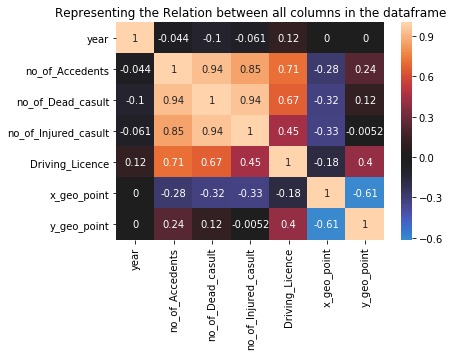

In [455]:
#import seaborns as sns
#corr()
car_correlations = car_accedent_licence_related.corr();
sns.heatmap(car_correlations, annot=True, center=0)
plt.title('Representing the Relation between all columns in the dataframe')
plt.show()

In [456]:
# to save a figure : 
fig.savefig("heatMap-allColumns.png", dpi=200)

#### subplot histograms

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

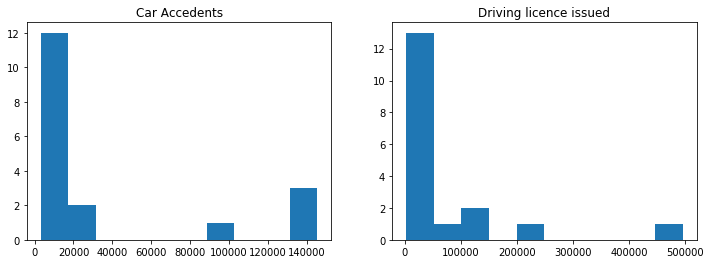

In [460]:

n = np.random.randn(100000)
fig, axes = plt.subplots(1,2, figsize=(12,4))
car= car_accedent_licence_related.no_of_Accedents
dead=car_accedent_licence_related.Driving_Licence
axes[0].hist(car)
axes[0].set_title('Car Accedents')
axes[1].hist(dead)
axes[1].set_title('Driving licence issued')
plt.show()


In [461]:
car_accedent_licence_related.head()

,region,year,no_of_Accedents,no_of_Dead_casult,no_of_Injured_casult,Driving_Licence,x_geo_point,y_geo_point
0,Al-Jouf,2016,10212,245,920,9371,29.967745,39.557037
1,Al-Jouf,2017,10469,240,862,8091,29.967745,39.557037
2,Hail,2016,10199,299,932,54507,27.400846,41.440696
3,Hail,2017,9379,265,773,22035,27.400846,41.440696
4,Jazan,2016,25873,514,2259,11504,17.207231,42.652581


In [467]:
#accedents_2017= car_accedent_licence_related[car_accedent_licence_related.year == 2017]
a_acc =(car_accedent_licence_related['year'].values==2017)
a_acc

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True])

In [468]:
car_accedent_licence_related[a_acc]

,region,year,no_of_Accedents,no_of_Dead_casult,no_of_Injured_casult,Driving_Licence,x_geo_point,y_geo_point
1,Al-Jouf,2017,10469,240,862,8091,29.967745,39.557037
3,Hail,2017,9379,265,773,22035,27.400846,41.440696
5,Jazan,2017,22161,466,2207,18345,17.207231,42.652581
7,Madinah,2017,16070,580,2917,36165,24.927535,39.491824
9,Makkah,2017,145541,1641,10623,142487,21.628963,41.263690
11,Najran,2017,3193,194,766,13825,18.451100,46.868850
13,Northern Boarder,2017,11540,112,374,5280,30.197075,41.817119
15,Riyadh,2017,99925,1399,4540,495307,23.081434,45.585751
17,Tabouk,2017,11713,348,1243,10232,27.901655,37.259858


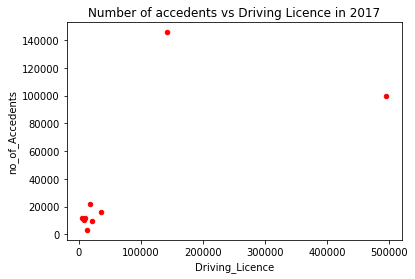

In [470]:
car_accedent_licence_related[a_acc].plot(kind='scatter', x='Driving_Licence', y='no_of_Accedents', title='Number of accedents vs Driving Licence in 2017', color='red');
plt.show()

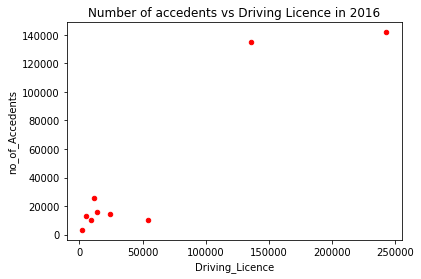

In [473]:
accedents_2016= (car_accedent_licence_related['year'].values == 2016)
car_accedent_licence_related[accedents_2016].plot(kind='scatter', x='Driving_Licence', y='no_of_Accedents', title='Number of accedents vs Driving Licence in 2016', color='red');
plt.show()

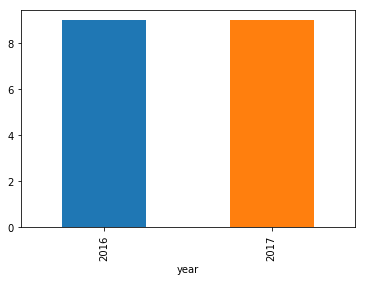

In [474]:
#Driving Licenses for 2016 vs 2017
car_accedent_licence_related.groupby('year')['Driving_Licence'].nunique().plot(kind='bar')
plt.show()


In [477]:
#Traffic Accedents for 2016 vs 2017
#car_accedent_licence_related.groupby('no_of_Accedents')['year'].nunique().plot(kind='bar')
#plt.show()
#he_17= car_accedent_licence_related.iloc[:,2:5]
#he_17
#s_1= car_accedent_licence_related.at[:,'no_of_Accedents']
#s_1
two_=(car_accedent_licence_related['year'].values== 2017 or 2016)

car_accedent_licence_related[two].plot(kind='bar', x='Driving_Licence', y='no_of_Accedents', title='Number of accedents vs Driving Licence in 2017', color='red');

plt.xlabel('2017')
plt.ylabel('number of accedents')
plt.title('The number of accednts 2017')

# Show the plot
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

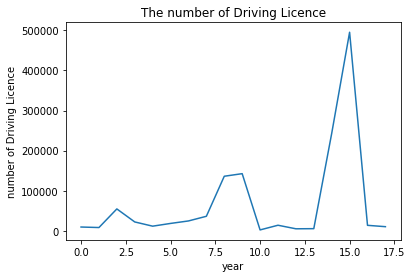

In [478]:
#Driving_L_1617= car_accedent_licence_related['Driving_Licence']
#Traffic Accidents for 2016 vs 2017
car_accedent_licence_related.Driving_Licence.plot()
plt.xlabel('year')
plt.ylabel('number of Driving Licence')
plt.title('The number of Driving Licence')

# Show the plot
plt.show()

C:\Users\Ahmed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


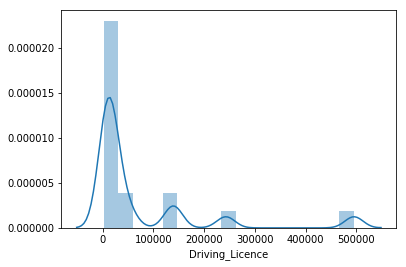

In [479]:
sns.distplot(car_accedent_licence_related.Driving_Licence);


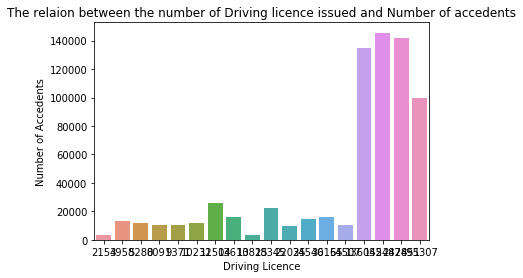

In [497]:
d=car_accedent_licence_related.Driving_Licence
sx=car_accedent_licence_related.no_of_Accedents
dd= car_accedent_licence_related.year
sns.barplot(y= sx, x=d)
plt.xlabel('Driving Licence')
plt.ylabel('Number of Accedents')
plt.title('The relaion between the number of Driving licence issued and Number of accedents')
#plt.xticks(range(18) , ['j16', 'Hail16', 'Jazan16', 'Mdena16', 'Makkah16', 'Njran16', 'Norht_b16','Riyadh16', 'Tabuk16','J17', 'Hail17', 'Jazan17', 'Mdena17', 'Makkah17', 'Njran17', 'Norht_b17','Riyadh17', 'Tabuk17' ])
plt.show()

Text(0.5, 0, 'Year')

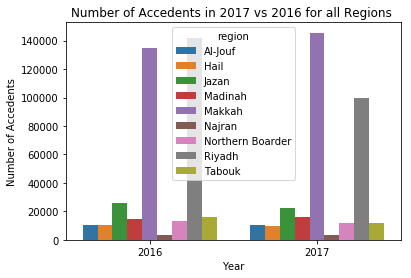

In [383]:
accedent= car_accedent_licence_related
ax = sns.barplot(x="year", y="no_of_Accedents", hue="region", data=accedent)
plt.title("Number of Accedents in 2017 vs 2016 for all Regions ")
plt.ylabel("Number of Accedents")
plt.xlabel("Year")

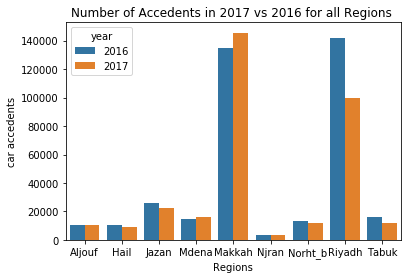

In [510]:
#Car Acccedents 207 vs 2016
sns.barplot(x="region", y="no_of_Accedents", hue="year", data=accedent)
ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.title("Number of Accedents in 2017 vs 2016 for all Regions ")
plt.ylabel("car accedents")
plt.xlabel("Regions")
plt.xticks(range(9) , ['Aljouf', 'Hail', 'Jazan', 'Mdena', 'Makkah', 'Njran', 'Norht_b','Riyadh', 'Tabuk'])
#plt.ylim(0,100)
plt.show()
#plt.xlim(0,) 

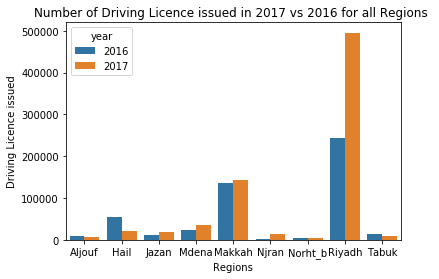

In [511]:
reg = sns.barplot(x="region", y="Driving_Licence", hue="year", data=accedent)
ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.title("Number of Driving Licence issued in 2017 vs 2016 for all Regions ")
plt.ylabel("Driving Licence issued")
plt.xlabel("Regions")
plt.xticks(range(9) , ['Aljouf', 'Hail', 'Jazan', 'Mdena', 'Makkah', 'Njran', 'Norht_b','Riyadh', 'Tabuk'])
plt.show()

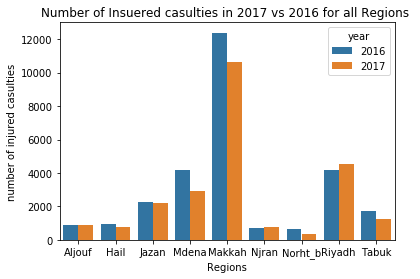

In [386]:
reg = sns.barplot(x="region", y='no_of_Injured_casult', hue='year', data=accedent);
plt.title("Number of Insuered casulties in 2017 vs 2016 for all Regions ")
plt.ylabel("number of injured casulties")
plt.xlabel("Regions")
plt.xticks(range(9) , ['Aljouf', 'Hail', 'Jazan', 'Mdena', 'Makkah', 'Njran', 'Norht_b','Riyadh', 'Tabuk'])
plt.show()

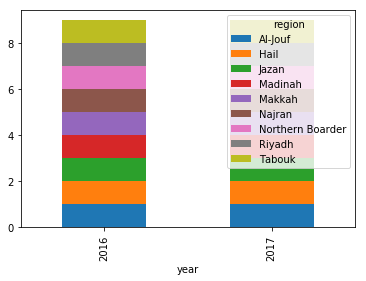

In [388]:
car_accedent_licence_related.groupby(['year','region'])['no_of_Accedents'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

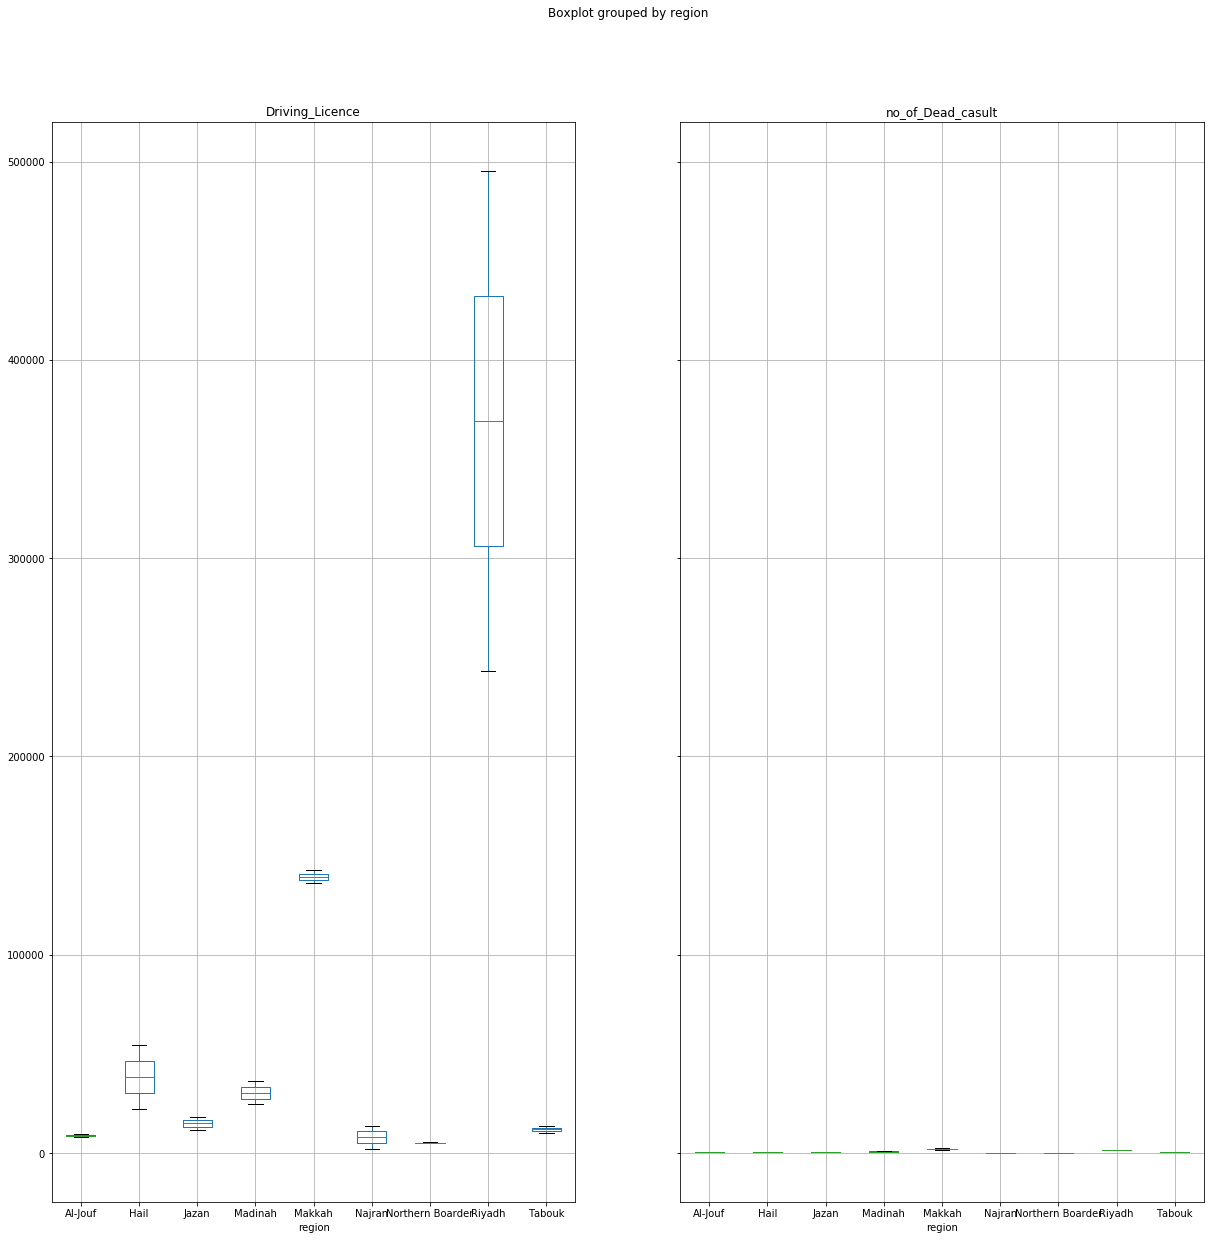

In [488]:
car_accedent_licence_related.boxplot(column=['Driving_Licence','no_of_Dead_casult'], by='region', figsize=(20,20));
plt.show()

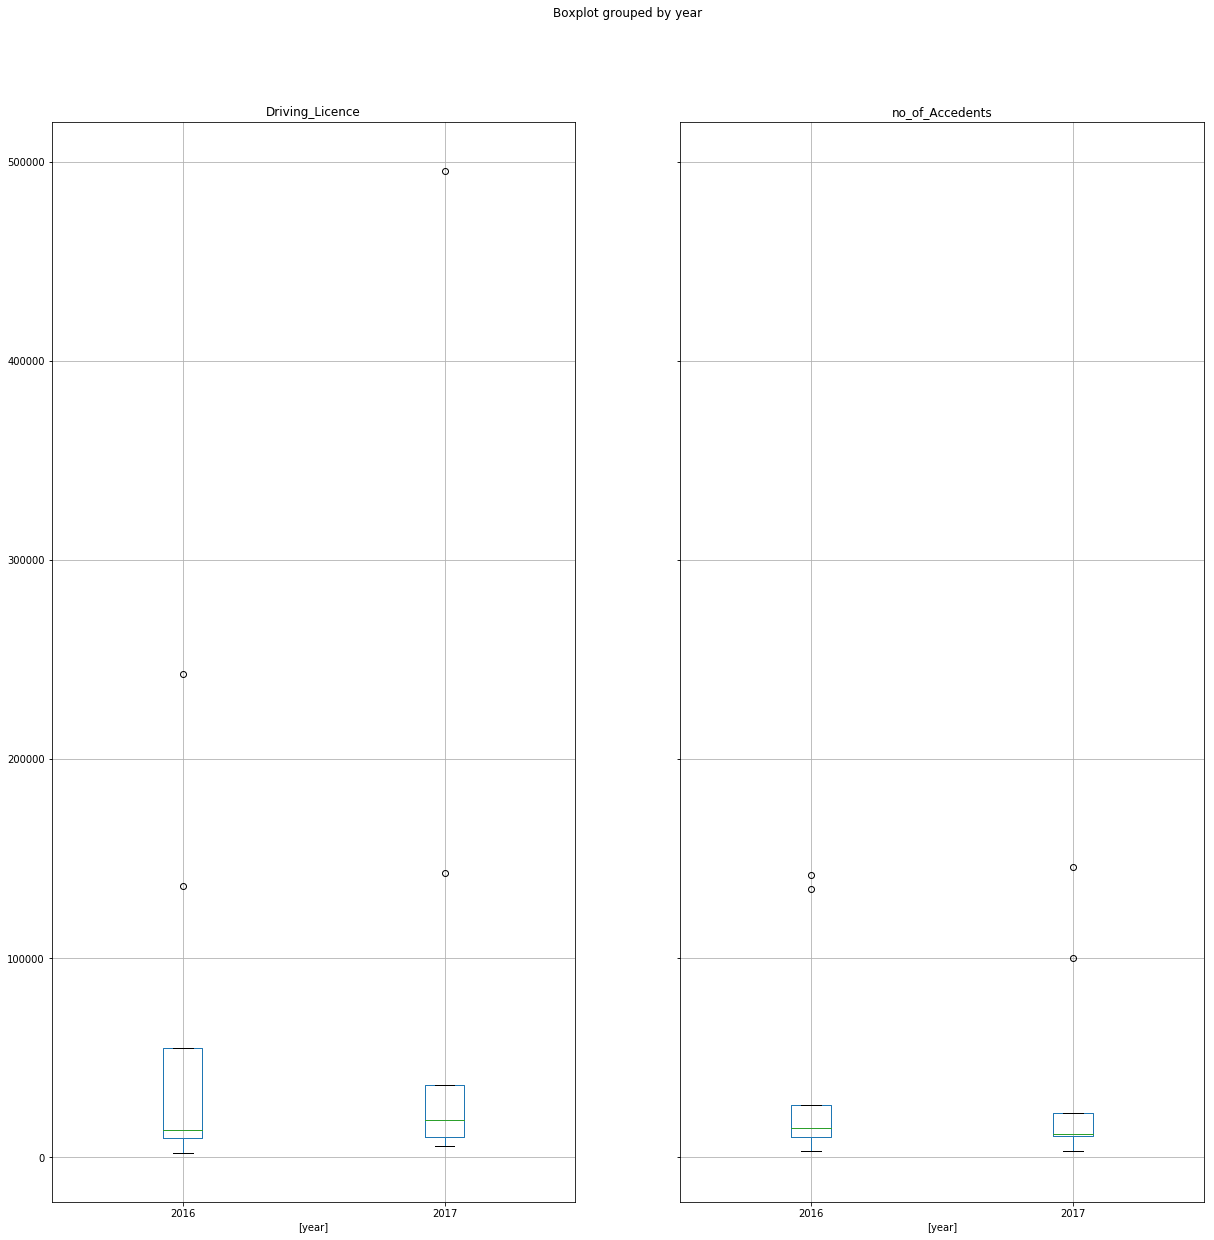

In [490]:
# Code
#df_c= car_accedent_licence_related.columns

car_accedent_licence_related.boxplot(column=['Driving_Licence','no_of_Accedents'], by=['year'],  figsize=(20,20));
plt.show()

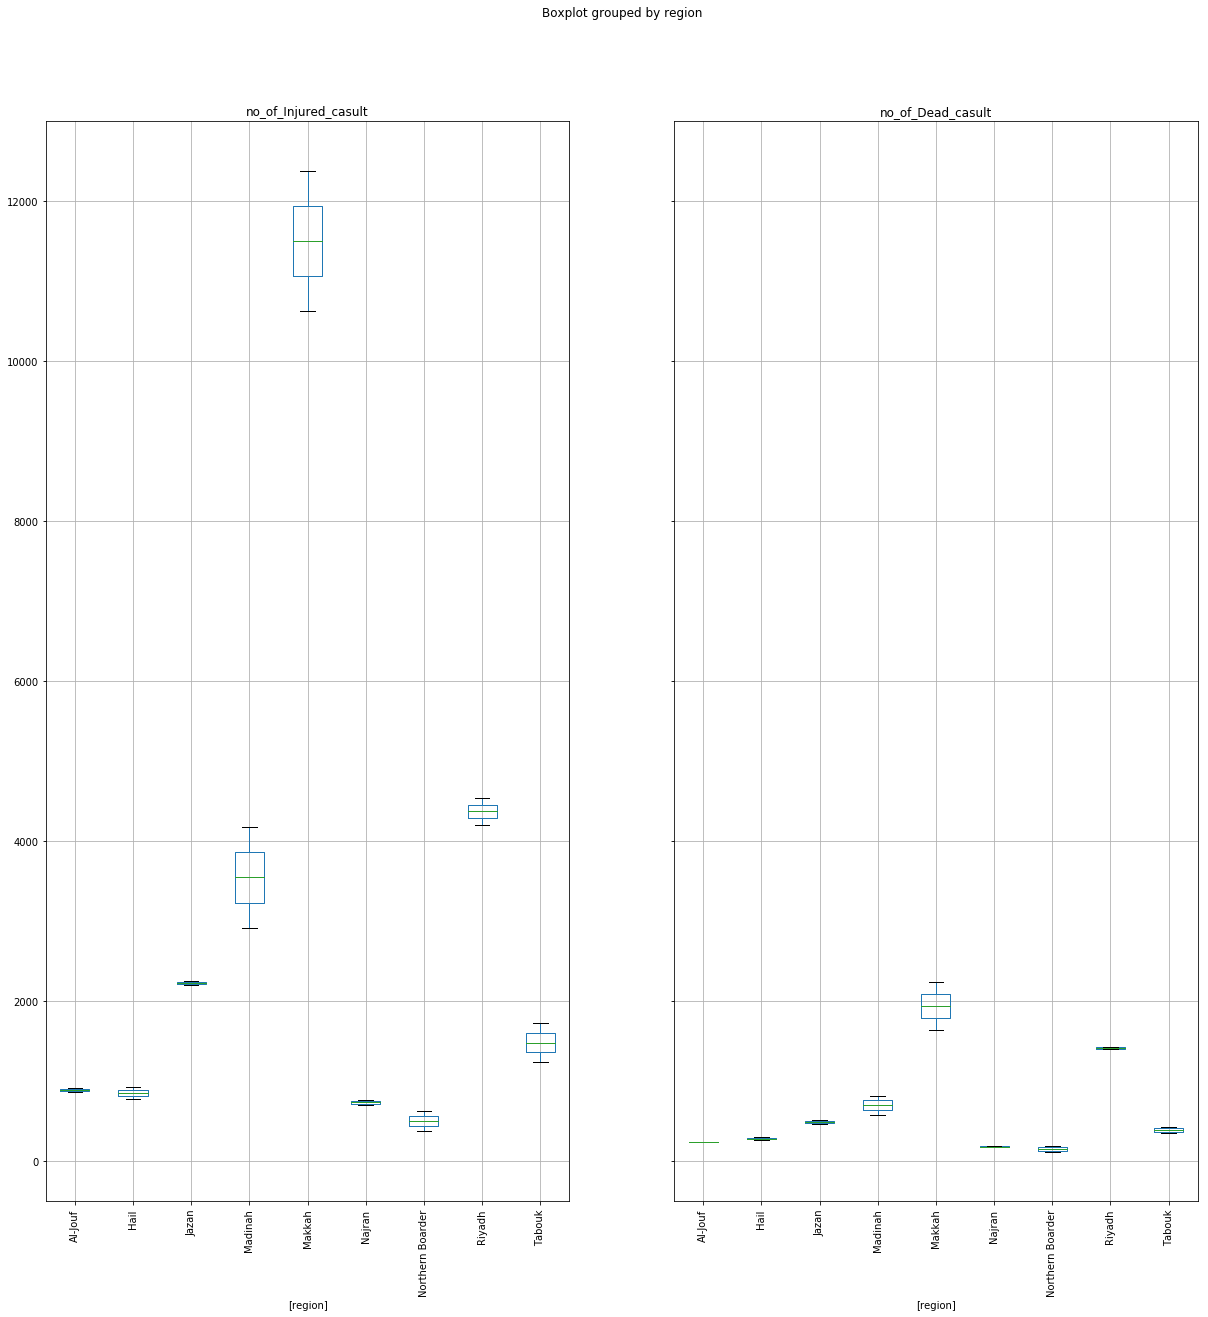

In [495]:
car_accedent_licence_related.boxplot(column=['no_of_Injured_casult','no_of_Dead_casult'], by=['region'], figsize=(20,20), rot=90);

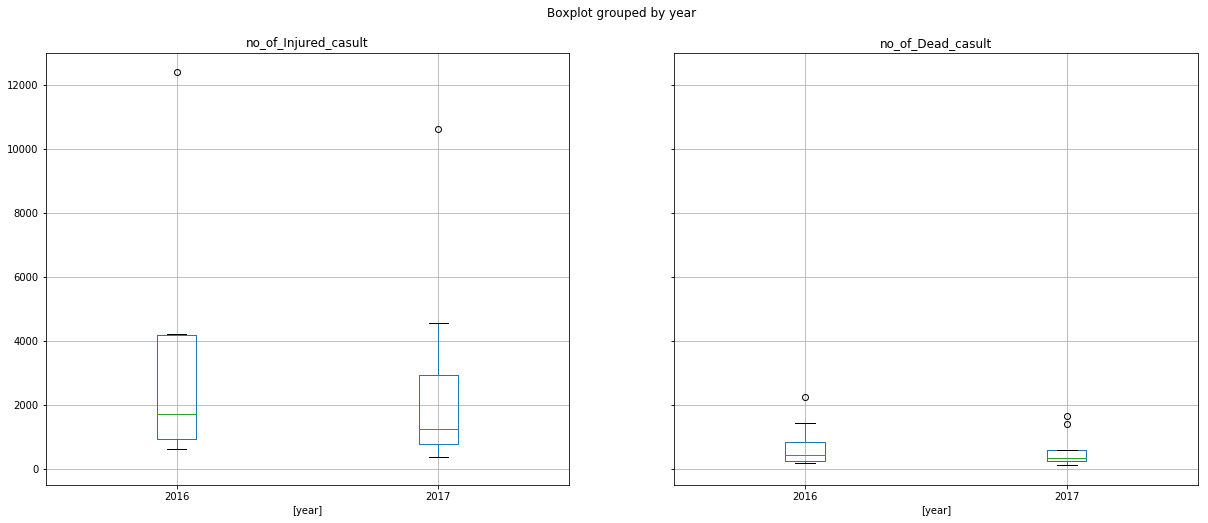

In [394]:
car_accedent_licence_related.boxplot(column=['no_of_Injured_casult','no_of_Dead_casult'], by=['year'], figsize=(20,8));

## Descriptive and Inferential Statistics

In [493]:
car_accedent_licence_related.describe()

,year,no_of_Accedents,no_of_Dead_casult,no_of_Injured_casult,Driving_Licence,x_geo_point,y_geo_point
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2016.500000,38877.000000,644.333333,2902.833333,69517.555556,24.529287,41.770823
std,0.514496,51442.889217,615.990737,3412.830880,124299.850286,4.634182,2.913111
min,2016.000000,3193.000000,112.000000,374.000000,2153.000000,17.207231,37.259858
25%,2016.000000,10276.250000,241.250000,795.250000,9586.250000,21.628963,39.557037
50%,2016.500000,13835.500000,391.000000,1483.500000,16085.000000,24.927535,41.440696
75%,2017.000000,24945.000000,761.500000,3867.250000,49921.500000,27.901655,42.652581
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,46.868850


#### Summarizing Distributions

by using the .describe() and noticing the data patterns from the previous box plot figures:
- There is a high value outler in the number of Driving licence issued in 2017, to 495,307 where the total average is only 16,085. And Riyadh was the region that reached this outlier.
- The maximum number of Injaries from car accedents by reagion was in Makkah, where it jumped to more than 12,000 Injaries, while the mean number among all reagins is only 2,980.
- Makkah reagion also, had the highest number of Dead casulties 2,243, and Riyadh had the second place where it had more than 800, even though the number of driving licences issued was the highes in Riyadh.
- Eventhough, the number of driving licence issued in 2017 was greater than 2016, but it seem's people began to take more care, so the number of Insured and Dead casulties was less in 2016.


**To determine the normality of thes data sets, we plotted several histograms bellow**
- from the following figure it shows that our joined datasets is not normally distributed, and thus, left skewed


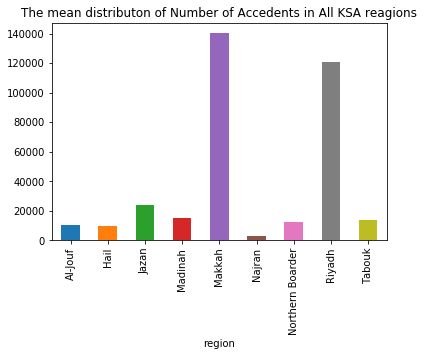

In [501]:
car_accedent_licence_related.groupby("region")['no_of_Accedents'].mean().plot(kind='bar');
plt.title('The mean distributon of Number of Accedents in All KSA reagions')
plt.show()

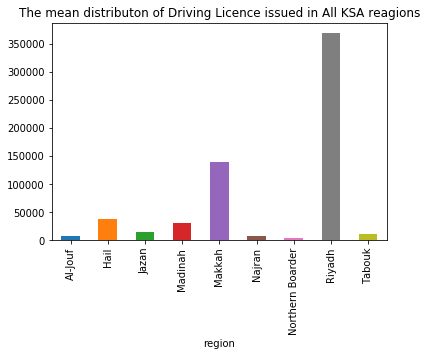

In [502]:
car_accedent_licence_related.groupby("region")['Driving_Licence'].mean().plot(kind='bar')
plt.title('The mean distributon of Driving Licence issued in All KSA reagions')
plt.show()

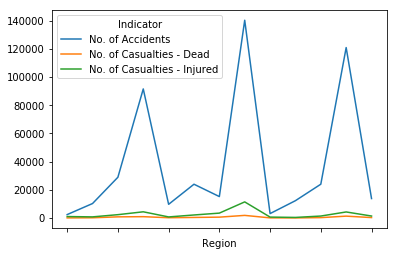

In [397]:
#central tendency mean:
# THE diagram bellow shows a peak in the number of accedents
wide_traffic_accedents.groupby('Region').mean().plot();

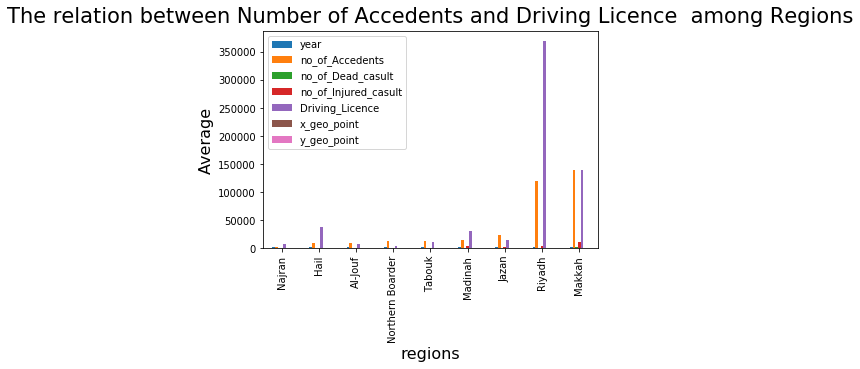

In [503]:
#statistical findings by the mean:
ax= car_accedent_licence_related.groupby('region').mean().sort_values(['no_of_Accedents','no_of_Dead_casult']).plot(kind='bar');
ax.set_title('The relation between Number of Accedents and Driving Licence  among Regions', fontsize=21, y=1.01);

# Move the legend.
ax.legend(loc=2);

# x-axis labels
ax.set_ylabel('Average', fontsize=16);

# y-axis labels
ax.set_xlabel('regions', fontsize=16);

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

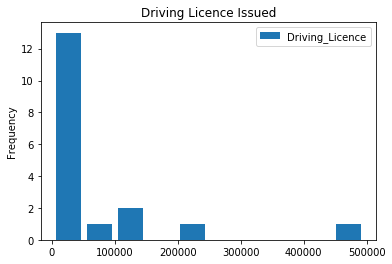

In [504]:
## histogram shows the data is not normalized, because they are left skewed 
car_accedent_licence_related[['Driving_Licence']].plot(kind='hist',rwidth=0.8)
plt.title('Driving Licence Issued')
plt.show()

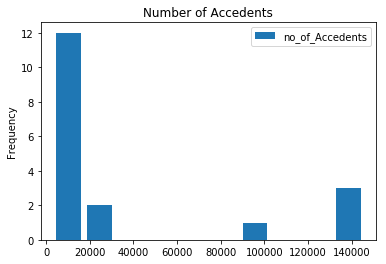

In [505]:
car_accedent_licence_related[['no_of_Accedents']].plot(kind='hist',rwidth=0.8)
plt.title('Number of Accedents')
plt.show()

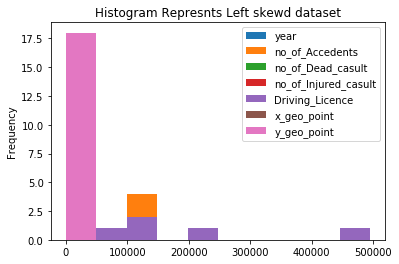

In [506]:
car_accedent_licence_related.plot(kind='hist',rwidth=5)
plt.title('Histogram Represnts Left skewd dataset')
plt.show()

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

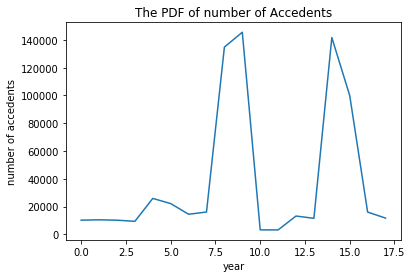

In [403]:

y = car_accedent_licence_related['no_of_Accedents']

plt.plot(y)
plt.xlabel('year')
plt.ylabel('number of accedents')
plt.title('The PDF of number of Accedents')

# Show the plot
plt.show()


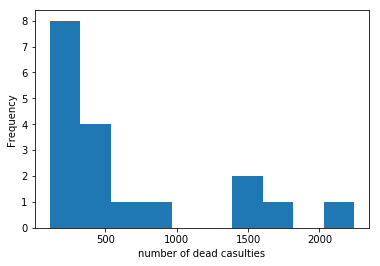

In [404]:
car_accedent_licence_related.no_of_Dead_casult.plot.hist();
plt.xlabel('number of dead casulties')
plt.show()

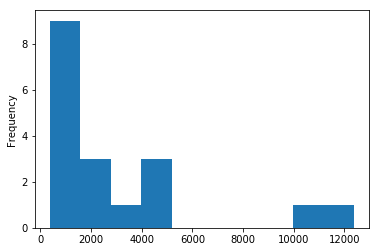

In [405]:
car_accedent_licence_related.no_of_Injured_casult.plot.hist();

Text(0.5, 1.0, 'Driving Licence Issued')

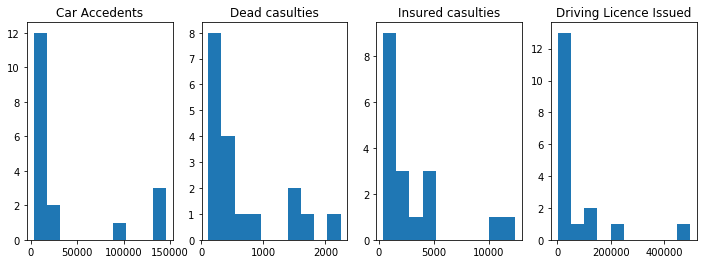

In [507]:
n = np.random.randn(100000)
fig, axes = plt.subplots(1,4, figsize=(12,4))
car= car_accedent_licence_related.no_of_Accedents
dead=car_accedent_licence_related.no_of_Dead_casult
axes[0].hist(car)
axes[0].set_title('Car Accedents')
axes[1].hist(dead)
axes[1].set_title('Dead casulties')
axes[2].hist(car_accedent_licence_related.no_of_Injured_casult)
axes[2].set_title('Insured casulties')
axes[3].hist(car_accedent_licence_related.Driving_Licence)
axes[3].set_title('Driving Licence Issued')


## Conclusions and Recommendations

In conclusion, The tow given datasets Traffic Aaccedents and Driving Licence were very usfel after beaing cleaned and joined together. 
Many fingings appeared during this project from statistics and figures plotting.
**First, the list of statistical analysis from this projct:**
- **The Minimum/ Max number of Accedents** is : 3,193/ 145,541 and the **mean** is : 38,877 Accedents
- **The Minimum/ Max number of Dead casulties** is: 112/2,243 and the **mean** is: 644 Dead
- **The Minimum/ Max number of Insured casulties** is: 374/12,383 and the **mean** is: 2,902 Insured
- **The Minimum/ Max number of Driving Licences issued** is: 2,153/495,307 and the **mean** is: 69,517 Driving licences issued.

- Najran has the minimum Driving licene issued in 2016 : 2,153
- Riyadh has the maximum Driving licence issued in 2017: 495,307
- the highest number of accedents in Makkah: 145,541 accedent happend in 2017.
- the lowest number of accedents in Najran:3,193 accedent happened in 2017

**More outcomes:**
The Regions that have more Driving Licenses issued in each year than the year average are 5 regions:* 
- Hail (2016-2017), Jazan (2017), Madinah(2016-2017), Makkah(2016-2017), Riyadh (2016-2017)

The Regions that have more Traffic Accidents happened in each year than the year average are 5 regions:
- Jazan(2016-2017), Madinah (2016-2017), Makkah(2016-2017),Riyadh(2016-2017), Tabuk (2016)

The datasets on plot, showed high value outler in
- The number of Driving licence issued in 2017, to 495,307 where the total average is only 16,085. And Riyadh was the region that reached this outlier.
- The maximum number of Injaries from car accedents by reagion was in Makkah, where it jumped to more than 12,000 Injaries, while the mean number among all reagins is only 2,980.
- Makkah reagion also, had the highest number of Dead casulties 2,243, and Riyadh had the second place where it had more than 800, even though the number of driving licences issued was the highes in Riyadh.
- Eventhough, the number of driving licence issued in 2017 was greater than 2016, but it seem's people began to take more care, so the number of Insured and Dead casulties was less in 2016.
 
**Final findings:**
-


The highes number of Driving licenses is issued in Riyah, which hit a high oulier number. Evan that Hail was also above the average; it wasnt icluded in the highes average range of accedetns in 2017.
On the other hand, Tabouk region was ander the average regions issueing driving licences, but thier number of accedents was above the averange range.

The highest percentage of Accedents, Injaries, and Deaths appears to be in Makkah Region 2017, even though it was second after Riyadh region in number of Licences issued.
Najran region had the lowest licences issued and the lowest Accedents as well.

Finally, the most impact between data is the Number of Driving licences issued, it positively affects on :
    - Number of accedents by 71%.
    - Number of Deaths by 60%
    - Number of Injaries by 45%.